### Задача №1
К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

In [18]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [19]:
# делим выборку на тестовую и обучающую
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

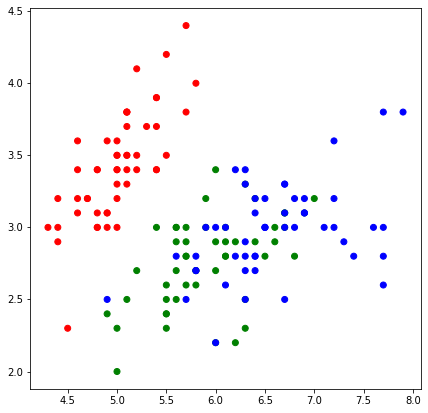

In [20]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [21]:
# подсчет метрики, используем евклидову метрику
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [22]:
{class_item: 0 for class_item in set(y_train)}

{0: 0, 1: 0, 2: 0}

In [41]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    # веса
    weights = {}
    
    for x in x_test:
        test_distances = []
       
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
            
            # Добавляем веса в словарь
            weights.update({str(x): 1/(distance + 1)})
            
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers, weights

In [42]:
# подсчет точности
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [43]:
k = 4

y_pred, w = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(f'Веса значений = {w}')

Точность алгоритма при k = 4: 0.700
Веса значений = {'[7.3 2.9]': 0.25539679298968676, '[4.9 3.1]': 0.6622946603252993, '[5.1 2.5]': 0.5025253169416734, '[4.8 3.4]': 0.6909830056250528, '[5.  3.5]': 0.5985083759092057, '[5.1 3.5]': 0.567673070032403, '[6.2 3.4]': 0.3557355384331067, '[6.4 2.7]': 0.3266316347104093, '[5.6 2.8]': 0.441518440112253, '[6.8 2.8]': 0.2912815065283106, '[5.4 3.9]': 0.45031747259871496, '[5.5 2.3]': 0.4130069023090093, '[6.8 3. ]': 0.2933997741163457, '[6.  2.2]': 0.3464047759419222, '[5.7 2.5]': 0.4037985644265594, '[5.7 4.4]': 0.3611176531903349, '[7.1 3. ]': 0.2697310069725398, '[6.1 2.8]': 0.3641097169059992, '[4.9 2.4]': 0.5145626072212692, '[6.1 3. ]': 0.36876905536910326, '[6.4 2.9]': 0.330865644535815, '[5.6 3. ]': 0.451151054290925, '[4.9 3.6]': 0.6096399597571444, '[4.4 2.9]': 0.769230769230769, '[6.5 3. ]': 0.32159487274576776, '[4.9 2.5]': 0.5375672049836051, '[4.8 3. ]': 0.6909830056250528, '[6.3 3.3]': 0.34451517520765074, '[6.5 2.8]': 0.31869911

### Задача № 2*
Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [49]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

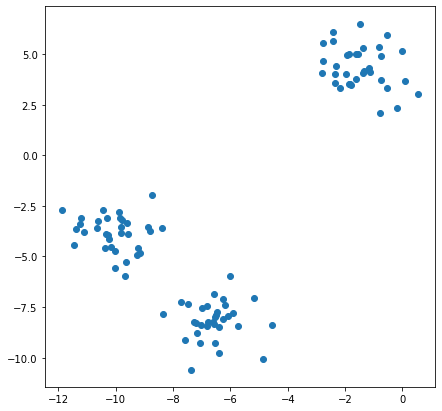

In [50]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [51]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    # средне
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [165]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [166]:
# функция оценки качества кластеризации через определение среднеквадратичное внутрикластерное расстояние
def mse_clusters(centroids, classes):
    
    err = []
    
    for class_item in classes:
       err.append((np.sum((classes[class_item] - centroids[class_item])) ** 2 ) / len(np.array(classes[class_item])))

    return np.sum(err)

In [167]:
max_iterations = 1
min_distance = 1e-4
k = 7

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

#visualize(centroids, clusters)

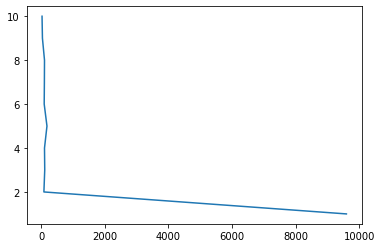

In [169]:
# Построим зависимость качества кластеризации
errors = []
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for k in ks:
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    
    errors.append(mse_clusters(centroids, clusters))
    

plt.plot(errors, ks)
plt.show()
    